In [1]:
!pip install textblob

     |████████████████████████████████| 636 kB 5.2 MB/s eta 0:00:01


In [2]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 4.5 MB/s eta 0:00:01


In [3]:
!pip uninstall keras -y

In [4]:
!pip uninstall tensorflow -y

In [5]:
!pip install keras==2.4.3

In [6]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 29 kB/s /s eta 0:00:01█████████▉                 | 148.7 MB 70.3 MB/s eta 0:00:0301
     |████████████████████████████████| 26.1 MB 77.9 MB/s eta 0:00:01�█████████████████         | 18.8 MB 77.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 6.8 MB 56.5 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 72.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 459 kB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 66.2 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=712ec4d3d4203cc19e44e2e05bfa0c01bc0dff77e43e29c8f01ffc0362c817c2
  Stored in directory: /home/jupyter/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb241

In [7]:
import keras
keras.__version__

'2.4.3'

In [8]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from nltk.corpus import stopwords 
import re

import seaborn as sns
import matplotlib.pyplot as plt
import os


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import coo_matrix, hstack, vstack
from numpy import median

import gc


import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
import re
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

from keras.layers import Dense 
from keras import Sequential 
from keras import backend as K
import keras
import tensorflow as tf

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
!pip install -q kaggle

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pandas-profiling 2.8.0 requires visions[type_image_path]==0.4.4, but you'll have visions 0.4.6 which is incompatible.
jupyterlab-git 0.10.1 requires nbdime<2.0.0,>=1.1.0, but you'll have nbdime 2.0.0 which is incompatible.


In [10]:
# Next, install the Kaggle API client. 
!pip install -q kaggle


In [11]:
# Let's make sure the kaggle.json file is present. 
!ls -lha kaggle.json


-rw-r--r-- 1 jupyter jupyter 66 Aug 24 04:19 kaggle.json


In [12]:
# The Kaggle API client expects this file to be in ~/.kaggle, # so move it there. 
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/ 
# This permissions change avoids a warning on Kaggle tool startup. 
!chmod 600 ~/.kaggle/kaggle.json


In [13]:
!kaggle competitions download -c mercari-price-suggestion-challenge

 94%|█████████████████████████████████████▍  | 377M/403M [00:06<00:00, 27.6MB/s]
100%|████████████████████████████████████████| 403M/403M [00:07<00:00, 60.2MB/s]


In [14]:
!unzip mercari-price-suggestion-challenge.zip

Archive:  mercari-price-suggestion-challenge.zip
  inflating: sample_submission.csv.7z  
  inflating: sample_submission_stg2.csv.zip  
  inflating: test.tsv.7z             
  inflating: test_stg2.tsv.zip       
  inflating: train.tsv.7z            


In [15]:
# installing package to extract 7z files.

!sudo apt-get install p7zip-full -y


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,479 kB of archives.
After this operation, 5,469 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian stretch/main amd64 p7zip amd64 16.02+dfsg-3+deb9u1 [364 kB]
Get:2 http://deb.debian.org/debian stretch/main amd64 p7zip-full amd64 16.02+dfsg-3+deb9u1 [1,115 kB]
Fetched 1,479 kB in 0s (6,804 kB/s)
Selecting previously unselected package p7zip.
(Reading database ... 83856 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-3+deb9u1_amd64.deb ...
Unpacking p7zip (16.02+dfsg-3+deb9u1) ...
Selecting previously unselected package p7zip-full.
Preparing to unpack .../p7zip-full_16.02+dfsg-3+deb9u1_amd64.deb ...


In [16]:
# extracting train file.
!7z e train.tsv.7z -y


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 77912192 bytes (75 MiB)

Extracting archive: train.tsv.7z
--
Path = train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      3% - train.t                7% - train.t               11% - train.t               14% - train.t               18% - train.t               22% - train.t               26% - train.t               29% - train.t               33% - train.t               37% - train.t               40% - train.t               44% - train.t               48% - train.t               52% - train.t               55% - train.t               59% - train.t               62% - train.t               67% - train.t               70% - train.t               74% - train.t               78% -

In [17]:
!unzip test_stg2.tsv.zip

Archive:  test_stg2.tsv.zip
  inflating: test_stg2.tsv           


In [18]:
# reading train file into dataframe

train = pd.read_csv('train.tsv', sep = '\t',)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [19]:
train.shape

(1482535, 8)

In [20]:
test = pd.read_csv('test_stg2.tsv', '\t')
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [21]:
test.shape

(3460725, 7)

<h2>Data Cleaning </h2>

In [22]:
# removing products with zero price.

train = train[train['price']>0]
train.shape

(1481661, 8)

In [23]:
# imputing default values for missing values.

train['category_name'].fillna('none/none/none', inplace = True)

train['brand_name'].fillna('blank', inplace = True)

train['item_description'].fillna('No description yet', inplace = True)

test['category_name'].fillna('none/none/none', inplace = True)

test['brand_name'].fillna('blank', inplace = True)

test['item_description'].fillna('No description yet', inplace = True)

In [24]:
# Function to extract number from a string.

# https://www.geeksforgeeks.org/find-all-the-numbers-in-a-string-using-regular-expression-in-python/
def extract_num(a):   
    
    """ Takes string as input and returns first number from it"""
    try:
        if(type(a)==str):

            return int(re.search('([0-9]+)', a).group())

        else:
            return np.nan 
    except:
        return np.nan
    

In [25]:
# Function to expand contracted words.

# https://stackoverflow.com/a/47091490/4084039 
def decontracted(phrase): 
    
    """ Takes string as input and expands if any of the below contractions are present."""
    # specific    
    phrase = re.sub(r"won't", "will not", phrase)    
    phrase = re.sub(r"can\'t", "can not", phrase)    
    # general    
    phrase = re.sub(r"n\'t", " not", phrase)    
    phrase = re.sub(r"\'re", " are", phrase)    
    phrase = re.sub(r"\'s", " is", phrase)    
    phrase = re.sub(r"\'d", " would", phrase)    
    phrase = re.sub(r"\'ll", " will", phrase)    
    phrase = re.sub(r"\'t", " not", phrase)    
    phrase = re.sub(r"\'ve", " have", phrase)    
    phrase = re.sub(r"\'m", " am", phrase)    
    return phrase


In [26]:
stopwords = set(stopwords.words('english'))
stopwords.add('[rm]')

In [27]:
# code to remove special characters and stopwords.

preprocessed_description = [] 
# tqdm is for printing the status bar 
for sentance in tqdm(train['item_description'].values):    
    sent = decontracted(sentance)    
    sent = sent.replace('\\r', ' ')    
    sent = sent.replace('\\"', ' ')    
    sent = sent.replace('\\n', ' ')    
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)      
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())
train['item_description'] = preprocessed_description



In [28]:
# code to remove special characters and stopwords.


preprocessed_description = [] 
# tqdm is for printing the status bar 
for sentance in tqdm(test['item_description'].values):    
    sent = decontracted(sentance)    
    sent = sent.replace('\\r', ' ')    
    sent = sent.replace('\\"', ' ')    
    sent = sent.replace('\\n', ' ')    
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)      
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())
test['item_description'] = preprocessed_description



<h2>Feature Extraction</h2>

In [29]:
# Extracting new features like, number of words, length, number, has a number from item_description field.

# Extracting has a description, has brand, has category from respective fields.

# https://stackoverflow.com/questions/37483470/how-to-calculate-number-of-words-in-a-string-in-dataframe

# https://stackoverflow.com/questions/43485469/apply-textblob-in-for-each-row-of-a-dataframe

# https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

train['no.words'] = train['item_description'].str.split().str.len()
train['length'] = train['item_description'].apply(len)


train['subjectivity'] = train['item_description'].apply(lambda word: TextBlob(word).sentiment.subjectivity)

train['number'] = train['item_description'].apply(extract_num)
train['number'].fillna(0, inplace = True)
train['hasnum'] = train['number'].astype(np.bool)

train['has_description'] = np.where(train['item_description'] == 'description yet', 0, 1)

train['has_brand'] = np.where(train['brand_name'] == 'blank', 0, 1)
train['has_category'] = np.where(train['category_name'] == 'none/none/none', 0, 1)
train['no_missing'] = train['has_description'] & train['has_brand'] & train['has_category']

train['name_length'] = train['name'].apply(len)


test['no.words'] = test['item_description'].str.split().str.len()
test['length'] = test['item_description'].apply(len)


test['subjectivity'] = test['item_description'].apply(lambda word: TextBlob(word).sentiment.subjectivity)

test['number'] = test['item_description'].apply(extract_num)
test['number'].fillna(0, inplace = True)
test['hasnum'] = test['number'].astype(np.bool)

test['has_description'] = np.where(test['item_description'] == 'description yet', 0, 1)

test['has_brand'] = np.where(test['brand_name'] == 'blank', 0, 1)
test['has_category'] = np.where(test['category_name'] == 'none/none/none', 0, 1)
test['no_missing'] = test['has_description'] & test['has_brand'] & test['has_category']

test['name_length'] = test['name'].apply(len)


In [30]:
# applying log1p on price column which will be our target variable.

train['log1p'] = train['price'].apply(np.log1p)


In [31]:
# Creating new fields by merging existing ones.

train['name_brand'] = train['name'] + " " + train['brand_name']

train['text'] = train['item_description'] + " " + train['name'] + " " + train['category_name']


test['name_brand'] = test['name'] + " " + test['brand_name']

test['text'] = test['item_description'] + " " + test['name'] + " " + test['category_name']


<h2>Train Test Split</h2>

In [32]:
y = train['log1p'].values

train = train.drop(['train_id','name','category_name', 'brand_name', 'item_description', 'price', 'log1p'], axis = 1)

In [33]:
# splitting data.


x_train, x_cv, y_train, y_cv = train_test_split(train, y, test_size=0.2, random_state=42)



<h2>Vectorization</h2>

In [34]:
# Using TFIDF to vectorize name_brand and text fields.

vectorizer1 = HashingVectorizer(n_features = 80000,token_pattern='\w+',dtype = np.float32)

train_name_brand = vectorizer1.fit_transform(x_train['name_brand'])
cv_name_brand = vectorizer1.transform(x_cv['name_brand'])
test_name_brand = vectorizer1.transform(test['name_brand'])


vectorizer2 = HashingVectorizer(n_features = 100000, dtype = np.float32, token_pattern='\w+', ngram_range = (1,2))

train_text = vectorizer2.fit_transform(x_train['text'])
cv_text = vectorizer2.transform(x_cv['text'])
test_text = vectorizer2.transform(test['text'])


Summary:
1. Hashing vectorizer is same as countvectorizer except it doesn't save the vocabulary hence requires less memory.
2. Hashfunction takes a word as input and gives a number as output, this number acts as index of the column and we update the counts for this index whenever we encounter the same word.
3. we cannot retrieve the word given the index number.
4. n_features is the index range, if we select small range it leads to collisions.

In [35]:
# using minmaxscaler and standerscaler to vectorize remaining fields.

scaler_item = MinMaxScaler()
train_item_condition = scaler_item.fit_transform(x_train['item_condition_id'].values.reshape(-1,1))
cv_item_condition = scaler_item.transform(x_cv['item_condition_id'].values.reshape(-1,1))
test_item_condition = scaler_item.transform(test['item_condition_id'].values.reshape(-1,1))


train_shipping = x_train['shipping'].values.reshape(-1,1)
cv_shipping = x_cv['shipping'].values.reshape(-1,1)
test_shipping = test['shipping'].values.reshape(-1,1)


scaler = StandardScaler()
train_no_words = scaler.fit_transform(x_train['no.words'].values.reshape(-1,1))
cv_no_words = scaler.transform(x_cv['no.words'].values.reshape(-1,1))
test_no_words = scaler.transform(test['no.words'].values.reshape(-1,1))



scaler_len = StandardScaler()
train_length = scaler_len.fit_transform(x_train['length'].values.reshape(-1,1))
cv_length = scaler_len.transform(x_cv['length'].values.reshape(-1,1))
test_length = scaler_len.transform(test['length'].values.reshape(-1,1))




scaler_name = StandardScaler()
train_name_length = scaler_name.fit_transform(x_train['name_length'].values.reshape(-1,1))
cv_name_length = scaler_name.transform(x_cv['name_length'].values.reshape(-1,1))
test_name_length = scaler_name.transform(test['name_length'].values.reshape(-1,1))



scaler_sub = StandardScaler()
train_subjectivity = scaler_sub.fit_transform(x_train['subjectivity'].values.reshape(-1,1))
cv_subjectivity = scaler_sub.transform(x_cv['subjectivity'].values.reshape(-1,1))
test_subjectivity = scaler_sub.transform(test['subjectivity'].values.reshape(-1,1))



scaler = StandardScaler()
train_number = scaler.fit_transform(x_train['number'].values.reshape(-1,1))
cv_number = scaler.transform(x_cv['number'].values.reshape(-1,1))
test_number = scaler.transform(test['number'].values.reshape(-1,1))



train_hasnum = x_train['hasnum'].values.reshape(-1,1)
cv_hasnum = x_cv['hasnum'].values.reshape(-1,1)
test_hasnum = test['hasnum'].values.reshape(-1,1)



train_has_description = x_train['has_description'].values.reshape(-1,1)
cv_has_description = x_cv['has_description'].values.reshape(-1,1)
test_has_description = test['has_description'].values.reshape(-1,1)



train_has_brand = x_train['has_brand'].values.reshape(-1,1)
cv_has_brand = x_cv['has_brand'].values.reshape(-1,1)
test_has_brand = test['has_brand'].values.reshape(-1,1)



train_has_category = x_train['has_category'].values.reshape(-1,1)
cv_has_category = x_cv['has_category'].values.reshape(-1,1)
test_has_category = test['has_category'].values.reshape(-1,1)



train_no_missing = x_train['no_missing'].values.reshape(-1,1)
cv_no_missing = x_cv['no_missing'].values.reshape(-1,1)
test_no_missing = test['no_missing'].values.reshape(-1,1)


In [36]:
x_train = hstack([train_name_brand, train_text, train_item_condition,
        train_shipping, train_length,
       train_name_length, train_subjectivity,
         train_no_missing ]).tocsr()

In [37]:

x_cv = hstack([cv_name_brand, cv_text, cv_item_condition,
        cv_shipping, cv_length,
       cv_name_length, cv_subjectivity,
         cv_no_missing ]).tocsr()

In [38]:
gc.collect()

3592

In [39]:
# stacking individual columns.

x_test = hstack([test_name_brand, test_text, test_item_condition,
        test_shipping, test_length,
       test_name_length, test_subjectivity,
         test_no_missing ]).tocsr()

summary:
1. Using only 4 extra features: name_length, subjectivity of item description, length of description, missing values in brand or category or description.

In [40]:
print(x_train.shape)
print(x_cv.shape)
print(x_test.shape)

(1185328, 180006)
(296333, 180006)
(3460725, 180006)


<h2> Hyper paramter tuning of ridge regression</h2>

In [76]:
# training a ridge regression and finding best hyperparameter.



alpha = [0.0001, 0.01, 0.1, 1, 10]

train_score = []
cv_score = []

for i in tqdm(alpha):
    
    clf = Ridge(alpha = i)
    
    clf.fit(x_train, y_train)
    y_train_ridge = clf.predict(x_train)
    y_cv_ridge = clf.predict(x_cv)
    
    train_score.append(np.sqrt(mean_squared_error(y_train,y_train_ridge)))
    cv_score.append(np.sqrt(mean_squared_error(y_cv,y_cv_ridge)))
   

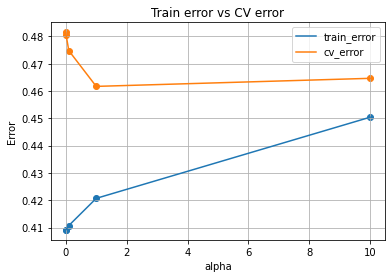

In [77]:
plt.plot(alpha,train_score,label="train_error")
plt.scatter(alpha,train_score)
plt.plot(alpha,cv_score,label='cv_error')
plt.scatter(alpha,cv_score)
plt.title("Train error vs CV error")
plt.xlabel("alpha")
plt.ylabel("Error")
plt.grid()
plt.legend()
plt.show()

In [78]:
# Finding alpha with min cv_score

print('best alpha is:',alpha[cv_score.index(min(cv_score))])

best alpha is: 1


<h2> Retraining ridge regression with best alpha </h2>

In [79]:
clf_ridge = Ridge(alpha = 1)

clf_ridge.fit(x_train, y_train)
y_train_ridge = clf_ridge.predict(x_train)
y_cv_ridge = clf_ridge.predict(x_cv)
y_test_ridge = clf_ridge.predict(x_test)

In [80]:
print("best ridge regression score:")
print("Train_RMSLE:",np.sqrt(mean_squared_error(y_train,y_train_ridge)))
print("CV_RMSLE: ",np.sqrt(mean_squared_error(y_cv,y_cv_ridge)))


best ridge regression score:
Train_RMSLE: 0.42068412548047696
CV_RMSLE:  0.4616831502162845


summary:
1. we got CV RMSLE as 0.46 for alpha = 1 which is a good score for a simple linear model.

<h2> Hyperparameter Tuning of lgb regressor</h2>

In [41]:
# Training lgb and finding best hyperparameter.

params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'verbosity': -1,
        'metric': 'RMSE',
    }

train_score = []
cv_score = []


num_leaves = [25,75,150]
max_depth = [5,8,12,-1]

d_train = lgb.Dataset(x_train, label=y_train)



for i in tqdm(num_leaves):
    for j in max_depth:
    
        params['max_depth'] = j
        params['num_leaves'] = i
        
        clf = lgb.train(params,d_train)


        y_train_lgb = clf.predict(x_train)
        y_cv_lgb = clf.predict(x_cv)

        train_score.append(np.sqrt(mean_squared_error(y_train,y_train_lgb)))
        cv_score.append(np.sqrt(mean_squared_error(y_cv,y_cv_lgb)))




In [42]:
a = []
b = []

for i in tqdm(num_leaves):
    for j in max_depth:
        
        a.append(i)
        b.append(j)

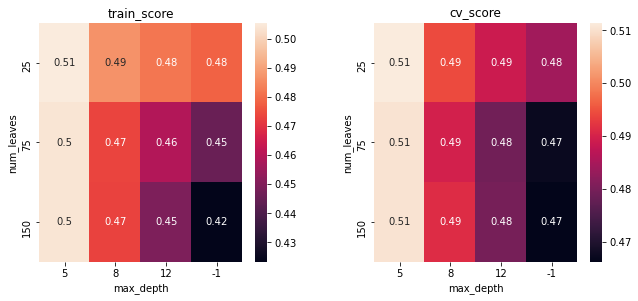

In [43]:
# Heatmap of train and cv error. 
 
# https://stackoverflow.com/questions/33942700/plotting-a-heat-map-from-three-lists-x-y-intensity 
x=np.unique(b)
y=np.unique(a) 
 
Z=np.array(train_score).reshape(len(y),len(x)) 
fig, ax = plt.subplots(figsize = (10,5), nrows = 1, ncols = 2) 
fig.tight_layout(pad=5.0) 
 
sns.heatmap(Z,xticklabels=max_depth, yticklabels = num_leaves, annot = True, ax=ax[0]) 
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('num_leaves')
ax[0].set_title('train_score')
Z=np.array(cv_score).reshape(len(y),len(x)) 
 
sns.heatmap(Z,xticklabels=max_depth, yticklabels = num_leaves, annot = True, ax=ax[1]) 
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('num_leaves')
ax[1].set_title('cv_score')
plt.show() 

In [44]:
print("From the above graphs best parameters for lgb are:")
print('max_depth:', -1)
print('num_leaves:', 150)

From the above graphs best parameters for lgb are:
max_depth: -1
num_leaves: 150


<h2> Retraining Lightgbm with best hyperparameters</h2>

In [ ]:
# training lgb with best hyperparameter.

params['max_depth'] = -1
params['num_leaves'] = 150
params['learning_rate'] = 0.75

clf_lgb = lgb.train(params,d_train)

In [53]:
y_train_lgb = clf_lgb.predict(x_train)
y_cv_lgb = clf_lgb.predict(x_cv)
y_test_lgb = clf_lgb.predict(x_test)

In [61]:
print("best lightgbm score:")
print("Train_RMSLE:",np.sqrt(mean_squared_error(y_train,y_train_lgb)))
print("CV_RMSLE: ",np.sqrt(mean_squared_error(y_cv,y_cv_lgb)))


best lightgbm score:
Train_RMSLE: 0.42328128949916954
CV_RMSLE:  0.4661464510424681


summary:
1. we got cv RMSLE as 0.46 for max_depth = -1 and num_leaves = 150.
2. we used two for loops instead of gridsearchcv to avoid data leakage.


<h2> Training MLP </h2>

In [62]:
# custom loss metric root mean square error.
# https://stackoverflow.com/questions/43855162/rmse-rmsle-loss-function-in-keras

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    

In [63]:
from keras.callbacks import ModelCheckpoint
filepath = "model1.h5" 
checkpoint1 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [64]:
# Building MLP.

# https://www.kaggle.com/lopuhin/mercari-golf-0-3875-cv-in-75-loc-1900-s 
model_in = keras.Input(shape=(x_train.shape[1],),dtype = 'float32', sparse=True )
out = Dense(256, activation='relu')(model_in)
out = Dense(128, activation='relu')(out)
out = Dense(64, activation='relu')(out)
out = Dense(1)(out)
model = keras.Model(model_in, out)
model.compile(loss = root_mean_squared_error, optimizer = 'adam',)

In [65]:
# dropout
history =  model.fit(x_train, y_train, validation_data = (x_cv, y_cv), batch_size = 1024, epochs = 5, callbacks= [checkpoint1], shuffle =True)

Epoch 1/5
1158/1158 [==============================] - ETA: 0s - loss: 0.5079
Epoch 00001: val_loss improved from inf to 0.43373, saving model to model1.h5
1158/1158 [==============================] - 471s 407ms/step - loss: 0.5079 - val_loss: 0.4337
Epoch 2/5
1158/1158 [==============================] - ETA: 0s - loss: 0.3743
Epoch 00002: val_loss improved from 0.43373 to 0.42678, saving model to model1.h5
1158/1158 [==============================] - 466s 402ms/step - loss: 0.3743 - val_loss: 0.4268
Epoch 3/5
1158/1158 [==============================] - ETA: 0s - loss: 0.2963
Epoch 00003: val_loss did not improve from 0.42678
1158/1158 [==============================] - 463s 400ms/step - loss: 0.2963 - val_loss: 0.4338
Epoch 4/5
1158/1158 [==============================] - ETA: 0s - loss: 0.2385
Epoch 00004: val_loss did not improve from 0.42678
1158/1158 [==============================] - 458s 395ms/step - loss: 0.2385 - val_loss: 0.4388
Epoch 5/5
1158/1158 [=========================

<h2> Storing best MLP model predictions </h2>

In [66]:
# predictions of first MLP.
# https://stackoverflow.com/questions/51700351/valueerror-unknown-metric-function-when-using-custom -metric-in-keras 
# https://github.com/tensorflow/tensorflow/issues/32348
from keras.models import load_model 

model_mlp = load_model("model1.h5",compile= False)

y_train_mlp = model_mlp.predict(x_train)
y_cv_mlp = model_mlp.predict(x_cv)
y_test_mlp = model_mlp.predict(x_test)

In [67]:
print("best MLP score:")
print("Train_RMSLE:",np.sqrt(mean_squared_error(y_train,y_train_mlp)))
print("CV_RMSLE: ",np.sqrt(mean_squared_error(y_cv,y_cv_mlp)))


best MLP score:
Train_RMSLE: 0.28977242660267283
CV_RMSLE:  0.4269801874128806


summary:
1. Above network architecture is based on the mentioned link. 
2. Number of neurons in each layer is obtained through brute force.
3. model checkpoint callback is used to save the best model.

<h2> Training another MLP on binary format dataset</h2>

In [68]:
filepath = "model2.h5" 
checkpoint2 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [69]:
# building another model.
model_in = keras.Input(shape=(x_train.shape[1],), sparse=True )
out = Dense(256, activation='relu')(model_in)
out = Dense(128, activation='relu')(out)
out = Dense(64, activation='relu')(out)
out = Dense(1)(out)
model2 = keras.Model(model_in, out)

model2.compile(loss = root_mean_squared_error, optimizer = 'adam',)

In [70]:
# creating a new dataset by turning every value into 1 or 0.

x_train_b = x_train.astype(np.bool)
x_cv_b = x_cv.astype(np.bool)
x_test_b = x_test.astype(np.bool)

In [71]:
# training the second model.
history2 = model2.fit(x_train_b, y_train, validation_data = (x_cv_b, y_cv), batch_size = 1024, epochs = 5,callbacks= [checkpoint2])

Epoch 1/5
1158/1158 [==============================] - ETA: 0s - loss: 0.4992
Epoch 00001: val_loss improved from inf to 0.43661, saving model to model2.h5
1158/1158 [==============================] - 461s 398ms/step - loss: 0.4992 - val_loss: 0.4366
Epoch 2/5
1158/1158 [==============================] - ETA: 0s - loss: 0.3632
Epoch 00002: val_loss improved from 0.43661 to 0.43296, saving model to model2.h5
1158/1158 [==============================] - 459s 396ms/step - loss: 0.3632 - val_loss: 0.4330
Epoch 3/5
1158/1158 [==============================] - ETA: 0s - loss: 0.2785
Epoch 00003: val_loss did not improve from 0.43296
1158/1158 [==============================] - 451s 389ms/step - loss: 0.2785 - val_loss: 0.4377
Epoch 4/5
1158/1158 [==============================] - ETA: 0s - loss: 0.2266
Epoch 00004: val_loss did not improve from 0.43296
1158/1158 [==============================] - 452s 391ms/step - loss: 0.2266 - val_loss: 0.4400
Epoch 5/5
1158/1158 [=========================

<h2> storing best MLP model predictions on binary dataset </h2>

In [72]:
# prediction of second MLP.
model_mlp_b = load_model("model2.h5", compile= False)

y_train_mlp_b = model_mlp_b.predict(x_train_b)

y_cv_mlp_b = model_mlp_b.predict(x_cv_b)
y_test_mlp_b = model_mlp_b.predict(x_test_b)

In [73]:
print("best MLP score:")
print("Train_RMSLE:",np.sqrt(mean_squared_error(y_train,y_train_mlp_b)))
print("CV_RMSLE: ",np.sqrt(mean_squared_error(y_cv,y_cv_mlp_b)))


best MLP score:
Train_RMSLE: 0.2692907290058947
CV_RMSLE:  0.43317586145336007


summary:
1. Above network architecture is based on the mentioned link. 
2. Number of neurons in each layer is obtained through brute force.
3. model checkpoint callback is used to save the best model.
4. Idea of using a binary dataset is from the winner's solution.

<h2> Creating a new dataset from predictions</h2>

In [81]:
# creating new dataset of individual model predictions.

df_train = pd.DataFrame(zip(y_train_mlp, y_train_ridge, y_train_lgb, y_train_mlp_b))
df_cv = pd.DataFrame(zip(y_cv_mlp, y_cv_ridge, y_cv_lgb,y_cv_mlp_b))
df_test = pd.DataFrame(zip(y_test_mlp, y_test_ridge, y_test_lgb,y_test_mlp_b))

<h2> Tuning a lasso regression to combine these predictions </h2>

In [82]:
# Training a lasso regression to find weights to combine these predictions.
alpha = [0.0001,0.001,0.01,0.1,1,10]
train_score = []
cv_score = []
for i in tqdm(alpha):
    clf = Lasso(alpha = i)

    clf.fit(df_train, y_train)

    y_train_lasso = clf.predict(df_train)
    y_cv_lasso = clf.predict(df_cv)
    
    train_score.append(np.sqrt(mean_squared_error(y_train,y_train_lasso)))
    cv_score.append(np.sqrt(mean_squared_error(y_cv,y_cv_lasso)))
   


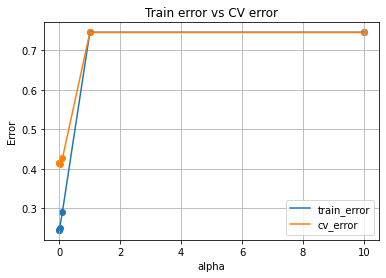

In [83]:
plt.plot(alpha,train_score,label="train_error")
plt.scatter(alpha,train_score)
plt.plot(alpha,cv_score,label='cv_error')
plt.scatter(alpha,cv_score)
plt.title("Train error vs CV error")
plt.xlabel("alpha")
plt.ylabel("Error")
plt.grid()
plt.legend()
plt.show()

In [84]:
print("best alpha is", alpha[cv_score.index(min(cv_score))])

best alpha is 0.01


<h2> Retraining lasso regression with best hyperparameter</h2>

In [85]:
# Lasso ensemble.

clf = Lasso(alpha = 0.01)

clf.fit(df_train, y_train)
y_train_pred = clf.predict(df_train)
y_cv_pred = clf.predict(df_cv)
y_test_pred = clf.predict(df_test)

In [86]:
print("best lasso encemble score:")
print("Train_RMSLE:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("CV_RMSLE: ",np.sqrt(mean_squared_error(y_cv,y_cv_pred)))


best lasso encemble score:
Train_RMSLE: 0.25031581234320827
CV_RMSLE:  0.4115492574529392


Summary:
1. We got cv RMSLE as 0.411 for alpha = 0.01, which is best so far.

<h2> Another Encemble using mean of predictions </h2>

In [87]:
print(y_cv_mlp.shape)
print(y_cv_ridge.shape)
print(y_cv_lgb.shape)
print(y_cv_mlp_b.shape)

(296333, 1)
(296333,)
(296333,)
(296333, 1)


In [88]:
# Taking mean of predictions.

y_cv_mean = np.mean([y_cv_mlp.reshape(-1,), y_cv_ridge, y_cv_lgb,y_cv_mlp_b.reshape(-1,)], axis = 0)
y_train_mean = np.mean([y_train_mlp.reshape(-1,), y_train_ridge, y_train_lgb,y_train_mlp_b.reshape(-1,)], axis = 0)
y_test_mean = np.mean([y_test_mlp.reshape(-1,), y_test_ridge, y_test_lgb,y_test_mlp_b.reshape(-1,)], axis = 0)

In [89]:
print("best mean encemble score:")
print("Train_RMSLE:",np.sqrt(mean_squared_error(y_train,y_train_mean)))
print("CV_RMSLE: ",np.sqrt(mean_squared_error(y_cv,y_cv_mean)))


best mean encemble score:
Train_RMSLE: 0.3101273838924053
CV_RMSLE:  0.41327963410667523


Summary:
1. Mean ensemble gives cv RMSLE as 0.412 which is better than any individual model but slightly less than lasso ensemble.

<h2> PDF of True values and different model predictions </h2>

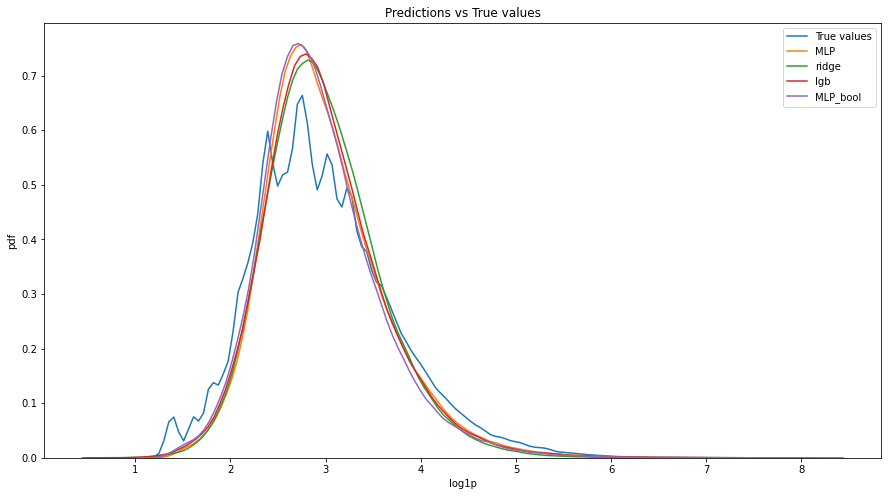

In [90]:

plt.figure(figsize=(15,8))
sns.distplot(y_cv, hist = False, label = 'True values')
sns.distplot(y_cv_mlp, hist = False, label = 'MLP')
sns.distplot(y_cv_ridge, hist = False, label = 'ridge')
sns.distplot(y_cv_lgb, hist = False, label = 'lgb')
sns.distplot(y_cv_mlp_b, hist = False, label = 'MLP_bool')
plt.xlabel('log1p')
plt.ylabel('pdf')
plt.title('Predictions vs True values')
plt.show()

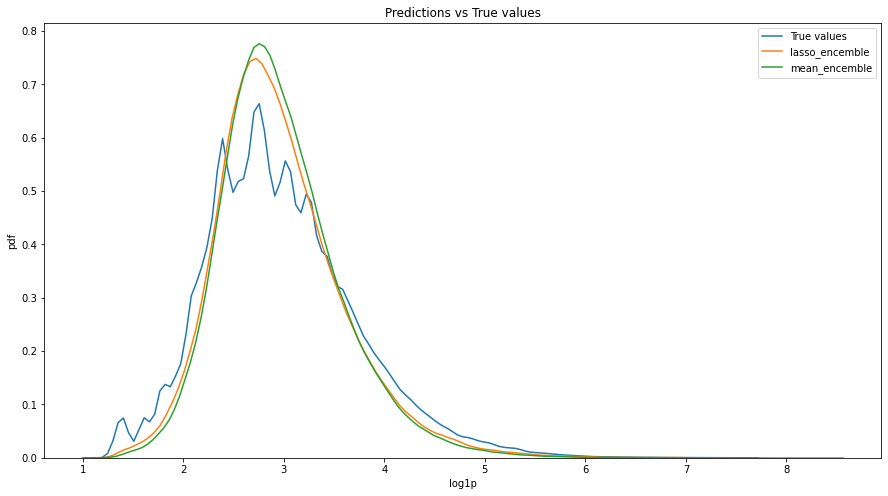

In [91]:

plt.figure(figsize=(15,8))
sns.distplot(y_cv, hist = False, label = 'True values')
sns.distplot(y_cv_pred, hist = False, label = 'lasso_encemble')
sns.distplot(y_cv_mean, hist = False, label = 'mean_encemble')
plt.xlabel('log1p')
plt.ylabel('pdf')
plt.title('Predictions vs True values')
plt.show()

Summary:
1. From graph we can say that lasso ensemble is doing better than mean ensemble, same is reflected in cv RMSLE score.

<h2> Performance of all the models</h2>

In [92]:
# Printing info about the features.
# code borrowed from below site
# http://zetcode.com/python/prettytable/ 

from prettytable import PrettyTable 
x = PrettyTable() 
x.field_names = ["Model","Vectorization", "Train_RMSLE","CV_RMSLE"] 

x.add_row(['Ridge Regression', 'TFIDF', np.sqrt(mean_squared_error(y_train,y_train_ridge)),np.sqrt(mean_squared_error(y_cv,y_cv_ridge))])
x.add_row(['LightGBM', 'TFIDF', np.sqrt(mean_squared_error(y_train,y_train_lgb)),np.sqrt(mean_squared_error(y_cv,y_cv_lgb))])
x.add_row(['MLP', 'TFIDF',np.sqrt(mean_squared_error(y_train,y_train_mlp)),np.sqrt(mean_squared_error(y_cv,y_cv_mlp))])
x.add_row(['MLP_b', 'bool',np.sqrt(mean_squared_error(y_train,y_train_mlp_b)),np.sqrt(mean_squared_error(y_cv,y_cv_mlp_b))])
x.add_row(['lasso_Encemble', 'ALL',np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_cv,y_cv_pred))])
x.add_row(['Mean_Encemble', 'ALL',np.sqrt(mean_squared_error(y_train,y_train_mean)),np.sqrt(mean_squared_error(y_cv,y_cv_mean))])


        
print(x)

+------------------+---------------+---------------------+---------------------+
|      Model       | Vectorization |     Train_RMSLE     |       CV_RMSLE      |
+------------------+---------------+---------------------+---------------------+
| Ridge Regression |     TFIDF     | 0.42068412548047696 |  0.4616831502162845 |
|     LightGBM     |     TFIDF     | 0.42328128949916954 |  0.4661464510424681 |
|       MLP        |     TFIDF     | 0.28977242660267283 |  0.4269801874128806 |
|      MLP_b       |      bool     |  0.2692907290058947 | 0.43317586145336007 |
|  lasso_Encemble  |      ALL      | 0.25031581234320827 |  0.4115492574529392 |
|  Mean_Encemble   |      ALL      |  0.3101273838924053 | 0.41327963410667523 |
+------------------+---------------+---------------------+---------------------+


<h2> Using Lasso Ensemble for final submission </h2>

In [122]:

submission = test[['test_id']]
preds_final = np.expm1(y_test_pred)
submission['price'] = preds_final
submission.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
result = pd.read_csv('submission.csv')
result

,test_id,price
0,0,6.703347
1,1,11.312233
2,2,67.247777
3,3,13.915406
4,4,7.955520
...,...,...
3460720,3460720,6.264978
3460721,3460721,38.781767
3460722,3460722,14.562746
3460723,3460723,19.800032


<h2> Final Submission score using lasso ensemble </h2>

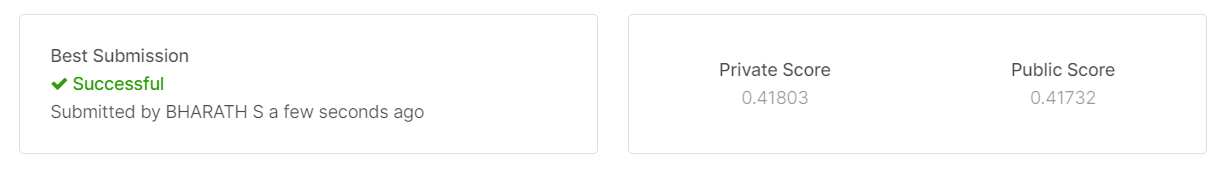

In [1]:
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook#:~:text=When%20using%20GenomeDiagram%20with%20Jupyter,it%20display%20in%20the%20notebook.

from IPython.display import Image

Image(filename =r'C:\Users\Bharath\Downloads\mercari_hash_lasso.png')

<h2> Predict Price of a Product </h2>

In [183]:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # to ignore warnings
def predict_price(x):
    """predict_price takes a single data point as input, applies all transformations on it and returns predicted price """
    
    if(len(x.shape)==1):
        # data cleaning
        if(x['category_name']!=x['category_name']):
            x['category_name'] = 'none/none/none'
        if(x['brand_name']!=x['brand_name']):
            x['brand_name'] = 'blank'
        if(x['item_description']!=x['item_description']):
            x['item_description'] = 'No description yet'

        # preprocessing
        sent = x['item_description']
        sent = decontracted(sent)    
        sent = sent.replace('\\r', ' ')    
        sent = sent.replace('\\"', ' ')    
        sent = sent.replace('\\n', ' ')    
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)      
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        x['item_description'] = sent.lower().strip()

        # feature engineering
        x['length'] = len(x['item_description'])
        x['subjectivity'] = TextBlob(x['item_description']).sentiment.subjectivity
        x['has_description'] = np.where(x['item_description'] == 'description yet', 0, 1)
        x['has_brand'] = np.where(x['brand_name'] == 'blank', 0, 1)
        x['has_category'] = np.where(x['category_name'] == 'none/none/none', 0, 1)
        x['no_missing'] = x['has_description'] & x['has_brand'] & x['has_category']
        x['name_length'] = len(x['name'])
        x['name_brand'] = x['name'] + " " + x['brand_name']
        x['text'] = x['item_description'] + " " + x['name'] + " " + x['category_name']
    
        # vectorization
        name_brand = vectorizer1.transform([x['name_brand']])
        text = vectorizer2.transform([x['text']])
        item_condition = scaler_item.transform(x['item_condition_id'].reshape(-1,1))
        shipping = x['shipping'].reshape(-1,1)
        length = scaler_len.transform(np.array(x['length']).reshape(1,-1))
        name_length = scaler_name.transform(np.array(x['name_length']).reshape(1,-1))
        subjectivity = scaler_sub.transform(np.array(x['subjectivity']).reshape(1,-1))
        no_missing = x['no_missing']

        # transformed datapoint
        x_point = hstack([name_brand, text, item_condition,shipping, length,name_length, subjectivity,no_missing ]).tocsr()
        

        # individual model predictions
        result1 = clf_ridge.predict(x_point)
        result2 = clf_lgb.predict(x_point)
        result3 = model_mlp.predict(x_point)
        result4 = model_mlp_b.predict(x_point)

        base_predictions = np.array([result1,result2,result3[0],result4[0]]).reshape(1,-1)

        # final model predictions
        final = clf.predict(base_predictions)[0]
        return np.expm1(final)
    else:
        # data cleaning
        x['category_name'].fillna('none/none/none', inplace = True)
        x['brand_name'].fillna('blank', inplace = True)
        x['item_description'].fillna('No description yet', inplace = True)

        # preprocessing
        preprocessed_description = [] 
        # tqdm is for printing the status bar 
        for sentance in (x['item_description'].values):    
            sent = decontracted(sentance)    
            sent = sent.replace('\\r', ' ')    
            sent = sent.replace('\\"', ' ')    
            sent = sent.replace('\\n', ' ')    
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)      
            sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
            preprocessed_description.append(sent.lower().strip())
        x['item_description'] = preprocessed_description
        

        # feature engineering
        x['length'] = x['item_description'].apply(len)
        x['subjectivity'] = x['item_description'].apply(lambda word: TextBlob(word).sentiment.subjectivity)
        x['has_description'] = np.where(x['item_description'] == 'description yet', 0, 1)
        x['has_brand'] = np.where(x['brand_name'] == 'blank', 0, 1)
        x['has_category'] = np.where(x['category_name'] == 'none/none/none', 0, 1)
        x['no_missing'] = x['has_description'] & x['has_brand'] & x['has_category']
        x['name_length'] = x['name'].apply(len)
        x['name_brand'] = x['name'] + " " + x['brand_name']
        x['text'] = x['item_description'] + " " + x['name'] + " " + x['category_name']

        
        # vectorization
        name_brand = vectorizer1.transform(x['name_brand'])
        text = vectorizer2.transform(x['text'])
        item_condition = scaler_item.transform(x['item_condition_id'].values.reshape(-1,1))
        shipping = x['shipping'].values.reshape(-1,1)
        length = scaler_len.transform(x['length'].values.reshape(-1,1))
        name_length = scaler_name.transform(x['name_length'].values.reshape(-1,1))
        subjectivity = scaler_sub.transform(x['subjectivity'].values.reshape(-1,1))
        no_missing = x['no_missing'].values.reshape(-1,1)

        # transformed datapoints
        x_point = hstack([name_brand, text, item_condition,shipping, length,name_length, subjectivity,no_missing ]).tocsr()
    
        # individual model predictions
        result1 = clf_ridge.predict(x_point)
        result2 = clf_lgb.predict(x_point)
        result3 = model_mlp.predict(x_point)
        result4 = model_mlp_b.predict(x_point)

        base_predictions = pd.DataFrame(zip(result1,result2,result3,result4))

        # final model predictions
        final = clf.predict(base_predictions)
        return np.expm1(final)
        
    

<h2> What is the error on prediction? </h2>

In [164]:
def predict_score(x,y):
    """Predict_score product details and actual price of the product and returns the RMSLE error of the predicted price"""
    if(len(x.shape)==1):
        y_predict = predict_price(x)
        y = np.log1p(y)
        y_predict = np.log1p(y_predict)
        return np.sqrt(mean_squared_error([y],[y_predict]))
    else:
        y_predict = predict_price(x)
        y = np.log1p(y)
        y_predict = np.log1p(y_predict)
        result = []
        for a,b in zip(y,y_predict):
            result.append(np.sqrt(mean_squared_error([a],[b])))
        return result

In [148]:
product_data = pd.read_csv('train.tsv', sep = '\t',)
product_data = product_data.drop(['train_id'], axis = 1)

print("select a product id between 0 to ", product_data.shape[0])

select a product id between 0 to  1482535


In [194]:
# select a product id

product_id = 13

print("calculating suggested price and RMSLE for the product with id:",product_id)
min_df = product_data.iloc[product_id]
min_df['suggested_price'] = predict_price(product_data.iloc[product_id])
min_df['RMSLE'] = predict_score(product_data.iloc[product_id],product_data.iloc[product_id]['price'])
min_df.to_frame().T

calculating suggested price and RMSLE for the product with id: 13


,name,item_condition_id,category_name,brand_name,price,shipping,item_description,suggested_price,RMSLE
13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4,1,No description yet,3.60649,0.0819723


In [185]:
print(" or select multitple ids between 0 to",product_data.shape[0])

 or select multitple ids between 0 to 1482535


In [186]:
# select multiple product ids

product_ids = [13, 102,1111,12111]

print("calculating suggested price and RMSLE for the products with ids:", product_ids)

min_df = product_data.iloc[product_ids]

min_df['suggested_price'] = predict_price(product_data.iloc[product_ids])

min_df['RMSLE'] = predict_score(product_data.iloc[product_ids],product_data.iloc[product_ids]['price'])
min_df


calculating price for the products with ids: [13, 102, 1111, 12111]


,name,item_condition_id,category_name,brand_name,price,shipping,item_description,suggested_price,RMSLE
13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet,3.606487,0.081972
102,Black Boho Floral Embroidered Maxi Dress,2,Women/Dresses/Knee-Length,NaN,29.0,0,Size medium in perfect condition,14.590790,0.654517
1111,Men's Nike 6-pair Dri-Fit BLK socks 8-12,1,Men/Athletic Apparel/Socks,Nike,25.0,0,Black Crew Socks,10.993940,0.773695
12111,LF First of a Kind Vintage Bodysuit,1,Women/Swimwear/One-Piece,LF,71.0,0,Brand new with tags,14.638239,1.526947


**Conclusions:**

1. Features like has number, number in item description aren't that useful.
2. gc.collect() helped in freeing up memory and avoid crashing during execution.
3. Using features like length of name, length of description, missing values, subjectivity of item description improved the score.
4. Used Hashing Vectorizer for the text data.
5. Training same MLP on new dataset creating by applying np.bool is helpful.
6. Used Lasso regression to get weights for the ensemble in the end.
7. Also used simple mean ensemble.